In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
game=pd.read_csv('games.csv')

In [3]:
game.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


In [4]:
game.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [10]:
len(game)

51490

## Distribution of Game Duration

In [6]:
time=game['gameDuration']

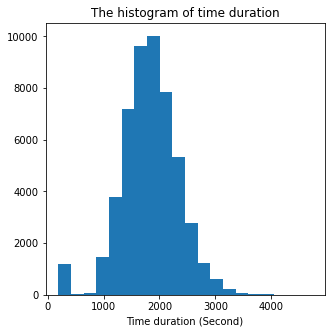

In [9]:
plt.figure(figsize=(5,5))
plt.hist(time,bins=20)
plt.xlabel('Time duration (Second)')
plt.title("The histogram of time duration")
plt.savefig("timeduration.png")

In [6]:
re_time=time[time>900]

(array([1.397e+03, 2.915e+03, 5.266e+03, 7.384e+03, 8.646e+03, 8.112e+03,
        6.452e+03, 4.527e+03, 2.691e+03, 1.440e+03, 6.800e+02, 4.010e+02,
        1.570e+02, 6.600e+01, 2.500e+01, 1.000e+01, 8.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00]),
 array([ 901.  , 1092.35, 1283.7 , 1475.05, 1666.4 , 1857.75, 2049.1 ,
        2240.45, 2431.8 , 2623.15, 2814.5 , 3005.85, 3197.2 , 3388.55,
        3579.9 , 3771.25, 3962.6 , 4153.95, 4345.3 , 4536.65, 4728.  ]),
 <BarContainer object of 20 artists>)

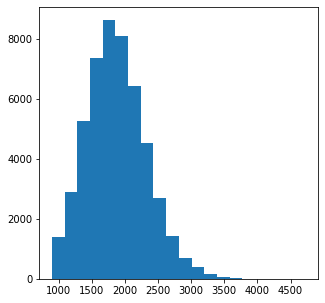

In [7]:
plt.figure(figsize=(5,5))
plt.hist(re_time,bins=20)

nearly a normal distribution.

## Probability of conditional winning

In [8]:
first_stage=game.iloc[:,4:10]

In [9]:
def calc_prob(f):
    data=first_stage[first_stage[f]!=0]
    n=len(data)
    same=first_stage[first_stage['winner']==first_stage[f]]
    prob=len(same)/n
    return prob

In [10]:
calc_prob('firstBlood')

0.5910866791008148

In [11]:
calc_prob('firstTower')  

0.708216480696939

In [12]:
calc_prob('firstInhibitor')

0.9110231344273897

In [13]:
calc_prob('firstBaron')

0.8067686987704918

In [14]:
calc_prob('firstDragon')

0.6803192564154374

## Histogram of towerKills/inhibitorKills/baronKills/dragonKills/riftHeraldKills

In [31]:
winner_t1=game[game['winner']==1]
winner_t1=winner_t1[['t1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills']]
winner_t1.columns=['TowerKills','InhibitorKills','BaronKills','DragonKills','RiftHeraldKills']
winner_t2=game[game['winner']==2]
winner_t2=winner_t2[['t2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHeraldKills']]
winner_t2.columns=['TowerKills','InhibitorKills','BaronKills','DragonKills','RiftHeraldKills']

winner=pd.concat([winner_t1,winner_t2])
winner.head()

,TowerKills,InhibitorKills,BaronKills,DragonKills,RiftHeraldKills
0,11,1,2,3,0
1,10,4,0,2,1
2,8,1,1,1,0
3,9,2,1,2,0
4,9,2,1,3,0


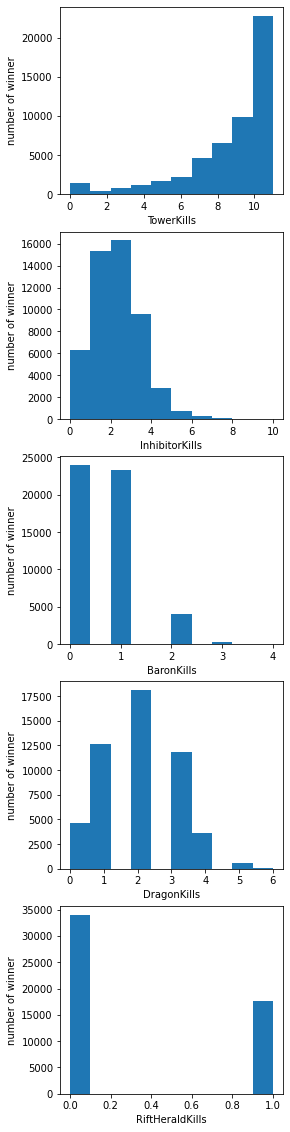

In [32]:
plt.figure(figsize=(4,20))
for i in range(5):
    plt.subplot(511+i)
    plt.hist(winner.iloc[:,i])
    plt.xlabel(winner.columns[i])
    plt.ylabel('number of winner')

## Logistic Regression of winning

In [4]:
game=game[game['gameDuration']>=900]

In [5]:
winner_t1=game[game['winner']==1]
winner_t1=winner_t1[['t1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills']]
winner_t1.columns=['TowerKills','InhibitorKills','BaronKills','DragonKills','RiftHeraldKills']
winner_t2=game[game['winner']==2]
winner_t2=winner_t2[['t2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHeraldKills']]
winner_t2.columns=['TowerKills','InhibitorKills','BaronKills','DragonKills','RiftHeraldKills']

winner=pd.concat([winner_t1,winner_t2])
winner['winning']=1
winner.head()

,TowerKills,InhibitorKills,BaronKills,DragonKills,RiftHeraldKills,winning
0,11,1,2,3,0,1
1,10,4,0,2,1,1
2,8,1,1,1,0,1
3,9,2,1,2,0,1
4,9,2,1,3,0,1


In [6]:
loser_t1=game[game['winner']==2]
loser_t1=loser_t1[['t1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills']]
loser_t1.columns=['TowerKills','InhibitorKills','BaronKills','DragonKills','RiftHeraldKills']
loser_t2=game[game['winner']==1]
loser_t2=loser_t2[['t2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHeraldKills']]
loser_t2.columns=['TowerKills','InhibitorKills','BaronKills','DragonKills','RiftHeraldKills']

loser=pd.concat([loser_t1,loser_t2])
loser['winning']=0
loser.head()

,TowerKills,InhibitorKills,BaronKills,DragonKills,RiftHeraldKills,winning
8,0,0,0,0,0,0
9,10,1,0,2,0,0
10,0,0,0,1,0,0
14,8,1,1,2,0,0
16,3,0,0,1,0,0


Text(0.5, 0.98, 'TowerKill for win and lose')

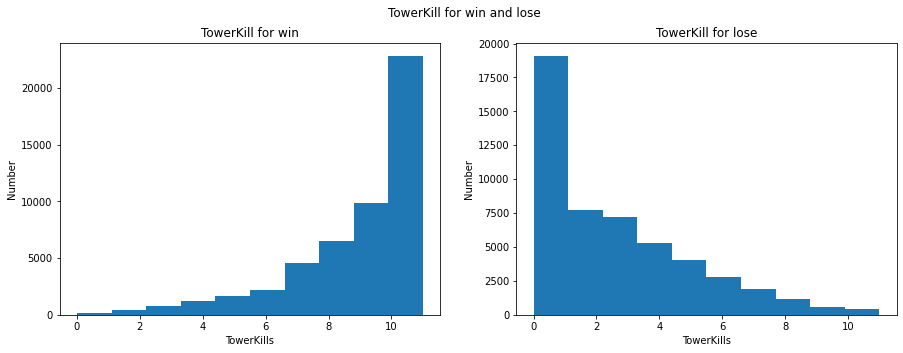

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(winner.iloc[:,0])
plt.xlabel(winner.columns[0])
plt.ylabel('Number')
plt.title('TowerKill for win')


plt.subplot(122)
plt.hist(loser.iloc[:,0])
plt.xlabel(loser.columns[0])
plt.ylabel('Number')
plt.title('TowerKill for lose')

plt.suptitle("TowerKill for win and lose")

Text(0.5, 0.98, 'InhibitorKill for win and lose')

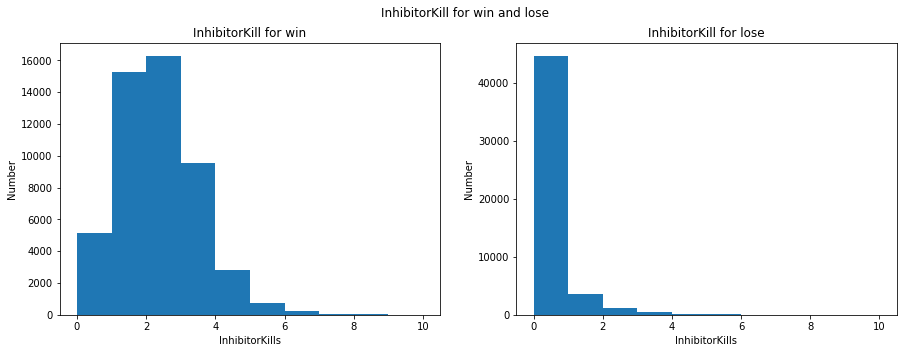

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(winner.iloc[:,1])
plt.xlabel(winner.columns[1])
plt.ylabel('Number')
plt.title('InhibitorKill for win')

plt.subplot(122)
plt.hist(loser.iloc[:,1])
plt.xlabel(loser.columns[1])
plt.ylabel('Number')
plt.title('InhibitorKill for lose')

plt.suptitle("InhibitorKill for win and lose")

Text(0.5, 0.98, 'BaronKill for win and lose')

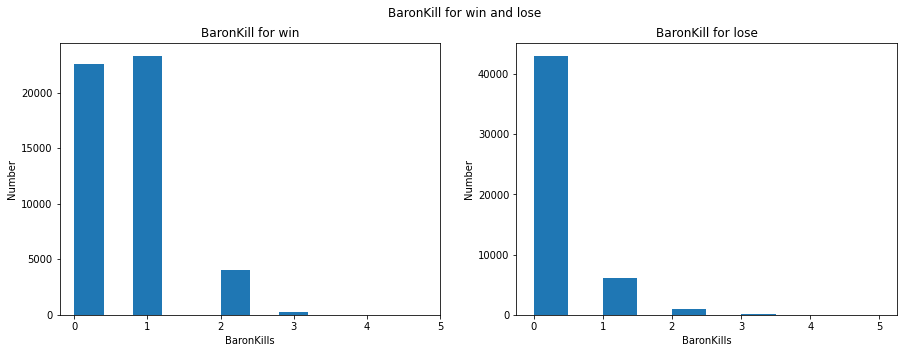

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(winner.iloc[:,2])
plt.xlabel(winner.columns[2])
plt.ylabel('Number')
plt.title('BaronKill for win')
plt.xlim([-0.2,5])

plt.subplot(122)
plt.hist(loser.iloc[:,2])
plt.xlabel(loser.columns[2])
plt.ylabel('Number')
plt.title('BaronKill for lose')

plt.suptitle("BaronKill for win and lose")

Text(0.5, 0.98, 'DragonKill for win and lose')

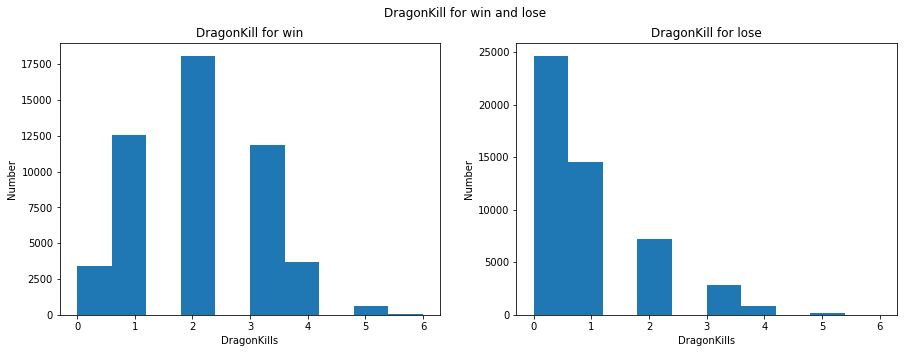

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(winner.iloc[:,3])
plt.xlabel(winner.columns[3])
plt.ylabel('Number')
plt.title('DragonKill for win')

plt.subplot(122)
plt.hist(loser.iloc[:,3])
plt.xlabel(loser.columns[3])
plt.ylabel('Number')
plt.title('DragonKill for lose')

plt.suptitle("DragonKill for win and lose")

Text(0.5, 0.98, 'RiftHeraldKill for win and lose')

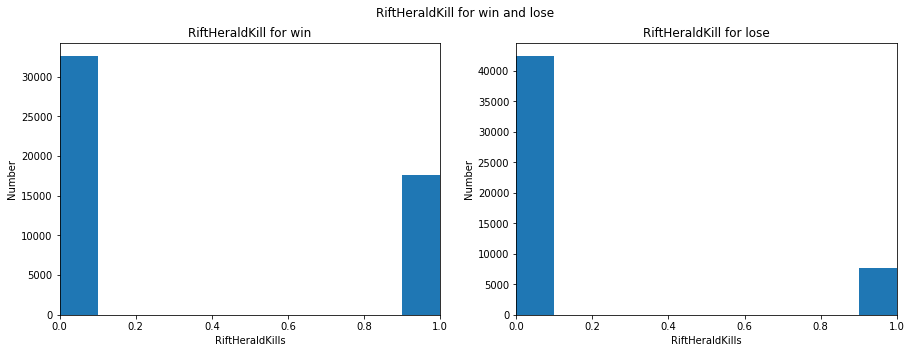

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(winner.iloc[:,4])
plt.xlabel(winner.columns[4])
plt.ylabel('Number')
plt.title('RiftHeraldKill for win')
plt.xlim([0,1])

plt.subplot(122)
plt.hist(loser.iloc[:,4])
plt.xlabel(loser.columns[4])
plt.ylabel('Number')
plt.title('RiftHeraldKill for lose')
plt.xlim([0,1])

plt.suptitle("RiftHeraldKill for win and lose")